In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import joblib

train_data = pd.read_csv('/content/financial_transactions.csv')

train_data.fillna(method='ffill', inplace=True)

features = ['transaction_id', 'customer_id', 'amount']
X_train = train_data[features]

model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

model.fit(X_train)

<ipython-input-9-29918f316f11>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


IsolationForest(contamination=0.01, random_state=42)

In [ ]:
model_path = 'model.pkl'
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

Model saved to model.pkl


<ipython-input-15-abb61d73575d>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data.fillna(method='ffill', inplace=True)


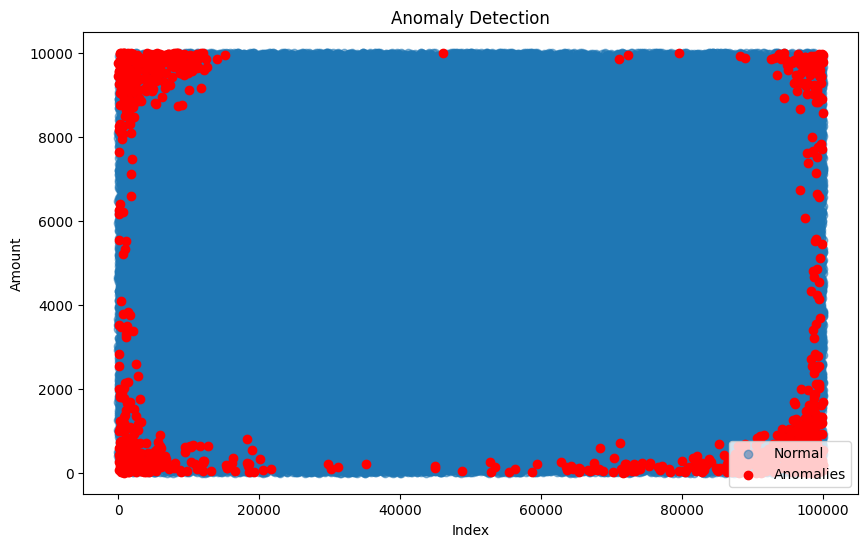

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

model_path = 'model.pkl'
model = joblib.load(model_path)

new_data = pd.read_csv('/content/financial_transactions.csv')

new_data.fillna(method='ffill', inplace=True)

features = ['transaction_id', 'customer_id', 'amount']
X_new = new_data[features]

new_data['anomaly'] = model.predict(X_new)

anomalies = new_data[new_data['anomaly'] == -1]
normal_data = new_data[new_data['anomaly'] != -1]

def generate_report(data, anomalies, normal_data, report_path='audit_report.txt', plot_path='anomaly_detection.png'):
    with open(report_path, 'w') as report:
        report.write("Audit Report\n")
        report.write("====================\n")
        report.write(f"Total records: {len(data)}\n")
        report.write(f"Anomalies detected: {len(anomalies)}\n\n")

        report.write("Summary Statistics for Normal Data:\n")
        report.write(normal_data.describe().to_string())
        report.write("\n\n")

        report.write("Summary Statistics for Anomalies:\n")
        report.write(anomalies.describe().to_string())

    plt.figure(figsize=(10, 6))
    plt.scatter(normal_data.index, normal_data['amount'], label='Normal', alpha=0.5)
    plt.scatter(anomalies.index, anomalies['amount'], color='red', label='Anomalies')
    plt.title('Anomaly Detection')
    plt.xlabel('Index')
    plt.ylabel('Amount')
    plt.legend()
    plt.savefig(plot_path)
    plt.show()

generate_report(new_data, anomalies, normal_data)
